In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

In [16]:
from IPython.display import HTML
style = "<style>svg{width:0.1% !important;height:0.1% !important;</style>"
HTML( style )

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz2.38"

In [4]:
titanic_data = pd.read_csv('titanic/train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
y = titanic_data.Survived

In [8]:
X = pd.get_dummies(X) # избавление от строковых значений

In [9]:
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [25]:
# graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))

# display(SVG(graph.pipe(format='svg')))

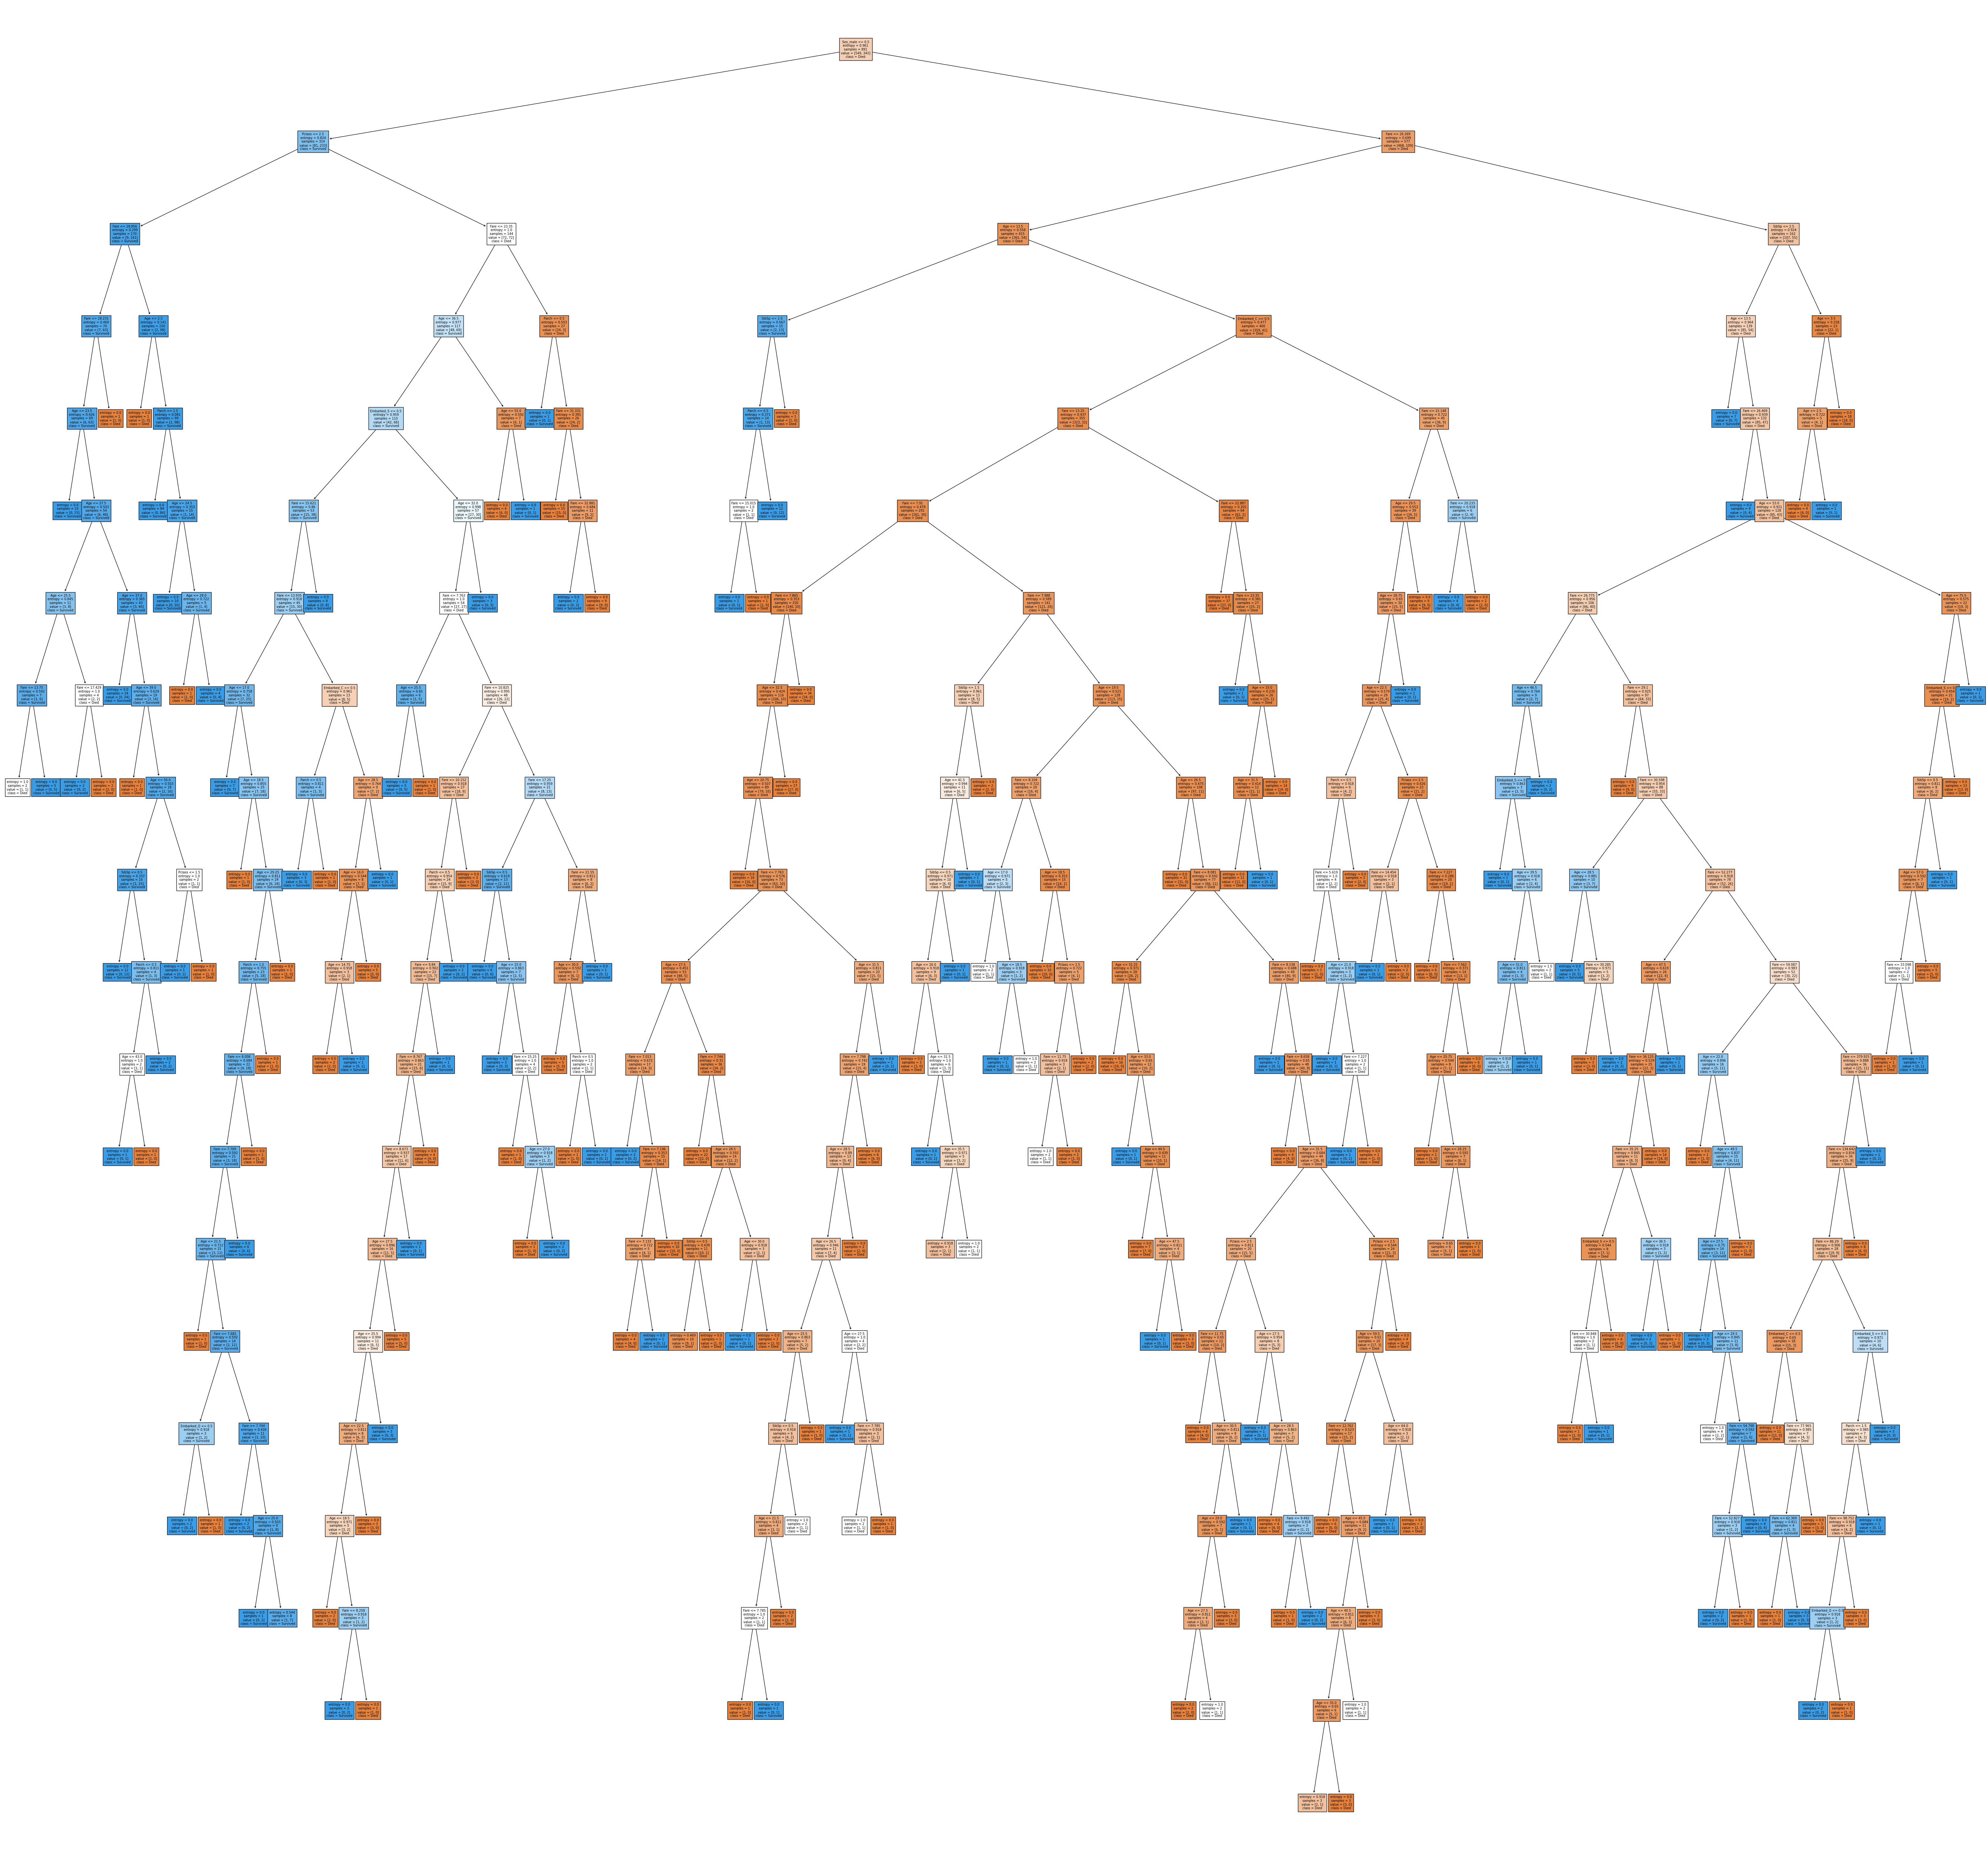

In [26]:
fig = plt.figure(figsize=(80,75))
_ = tree.plot_tree(clf,
                   feature_names=list(X),
                   class_names=['Died', 'Survived'],
                   filled=True,
                   fontsize=7)
fig.savefig("decision_tree.png")

In [27]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

0.9714765100671141

In [36]:
clf.score(X_train, y_train)

0.9966101694915255

In [38]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [40]:
clf.score(X_train, y_train)

0.8406040268456376

In [41]:
clf.score(X_test, y_test)

0.8067796610169492